# Empathy Estimator Model

In [1]:
#pip install missingno
#pip install fancyimpute

In [1]:
# importing libraries 

import glob
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Loading Data sets

In [2]:
# Get data file names
pa_nam = r"C:\Users\ak22755\EyeT\EyeT_group_dataset_III_image_name_letter_card_participant_**_trial_*.csv"
file_nam= glob.glob(pa_nam)     # glob is used to get a list of all CSV files in the directory 

ddf = []
for filename in file_nam:
    ddf.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
data1 = pd.concat(ddf, ignore_index=True)  # is used to concatenate all DataFrames in the data list into a single DataFrame

In [3]:
# loading Questionnaire datasetIB 
data2 = pd.read_csv('m:\\pc\\downloads\\Questionnaire_datasetIB.csv', encoding='ISO-8859-1')

In [4]:
data1.shape

(3776742, 71)

In [5]:
data2

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,5,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds
5,6,9742794,07.10.2020 16:23,07.10.2020 16:23,Yes,Proceed,2,2,4,3,...,1,3,4,2,2,3,3,119,95,9 minutes 39 seconds
6,7,9957985,20.10.2020 14:57,20.10.2020 14:57,Yes,Proceed,1,2,2,3,...,2,2,3,2,4,3,3,97,73,5 minutes 49 seconds
7,8,9981681,21.10.2020 14:13,21.10.2020 14:13,Yes,Proceed,1,3,1,3,...,4,2,2,2,1,1,4,98,76,9 minutes 35 seconds
8,9,10176722,29.10.2020 14:01,29.10.2020 14:01,Yes,Proceed,2,2,2,4,...,1,3,2,1,2,3,2,99,78,7 minutes 45 seconds
9,10,10187952,29.10.2020 22:29,29.10.2020 22:29,Yes,Proceed,1,3,3,3,...,2,2,3,3,3,3,3,100,76,4 minutes 45 seconds


## Exploring Data set 1

In [6]:
data1

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,3082,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
1,3083,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
2,3084,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
3,3085,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
4,3086,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776737,100618,74188757,774859965,Eye Tracker,Test group experiment,29.10.2020,Participant0003,Recording10,01.10.2020,01.10.2020,...,649.0,Saccade,33.0,912.0,NaN,NaN,NaN,NaN,NaN,NaN
3776738,100619,74197135,774868343,Eye Tracker,Test group experiment,29.10.2020,Participant0003,Recording10,01.10.2020,01.10.2020,...,649.0,Saccade,33.0,912.0,NaN,NaN,NaN,NaN,NaN,NaN
3776739,100620,74205245,774876453,NaN,Test group experiment,29.10.2020,Participant0003,Recording10,01.10.2020,01.10.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3776740,100621,74205245,774876453,Mouse,Test group experiment,29.10.2020,Participant0003,Recording10,01.10.2020,01.10.2020,...,649.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-201.0,986.0


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776742 entries, 0 to 3776741
Data columns (total 71 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           int64  
 1   Recording timestamp                  int64  
 2   Computer timestamp                   int64  
 3   Sensor                               object 
 4   Project name                         object 
 5   Export date                          object 
 6   Participant name                     object 
 7   Recording name                       object 
 8   Recording date                       object 
 9   Recording date UTC                   object 
 10  Recording start time                 object 
 11  Recording start time UTC             object 
 12  Recording duration                   int64  
 13  Timeline name                        object 
 14  Recording Fixation filter name       object 
 15  Recording software version      

## Preprocessing

Columns with no variance or constant values:
['Recording Fixation filter name', 'Recording software version', 'Recording resolution height', 'Recording resolution width', 'Recording monitor latency', 'Presented Media width', 'Presented Media height', 'Presented Media position X (DACSpx)', 'Presented Media position Y (DACSpx)']


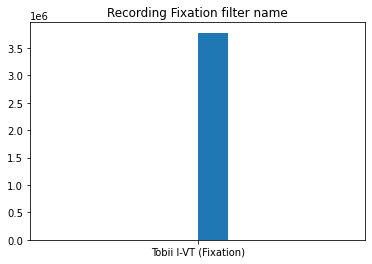

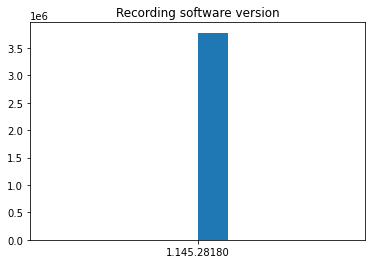

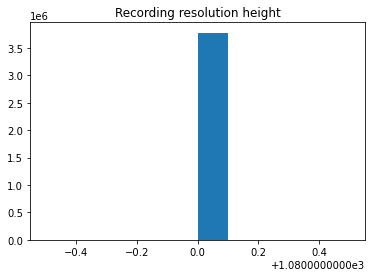

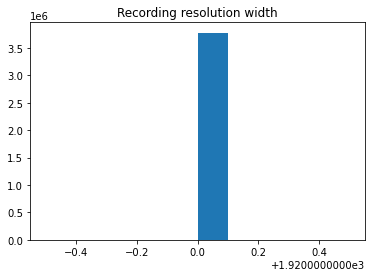

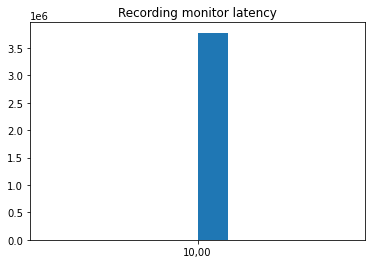

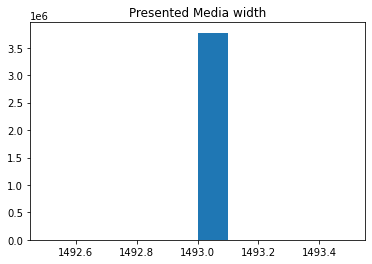

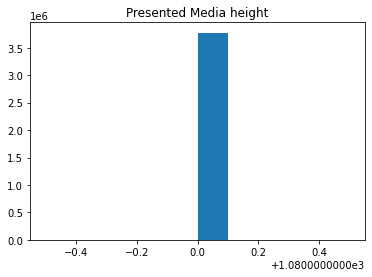

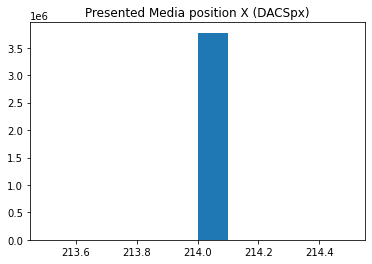

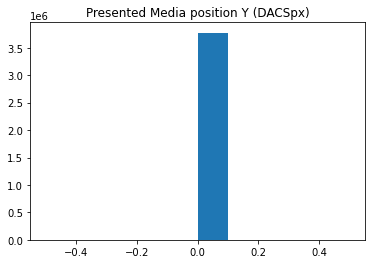

In [17]:
# Removing the variables which have no variance

import matplotlib.pyplot as plt

no_variance_cols = []
for col in data1.columns:
    if data1[col].nunique() <= 1:
        no_variance_cols.append(col)
        
print("Columns with no variance or constant values:")
print(no_variance_cols)

for col in no_variance_cols:
    plt.hist(data1[col])
    plt.title(col)
    plt.show()


In [18]:
# droping the above columns with no variance or constant values
data1 = data1.drop(columns=no_variance_cols)

## Cleaning and transformation

In [19]:
data1.isnull().sum()

Unnamed: 0                          0
Recording timestamp                 0
Computer timestamp                  0
Sensor                           2035
Project name                        0
                               ...   
Fixation point Y              1819701
Fixation point X (MCSnorm)    2006830
Fixation point Y (MCSnorm)    2006830
Mouse position X              3737573
Mouse position Y              3737573
Length: 62, dtype: int64

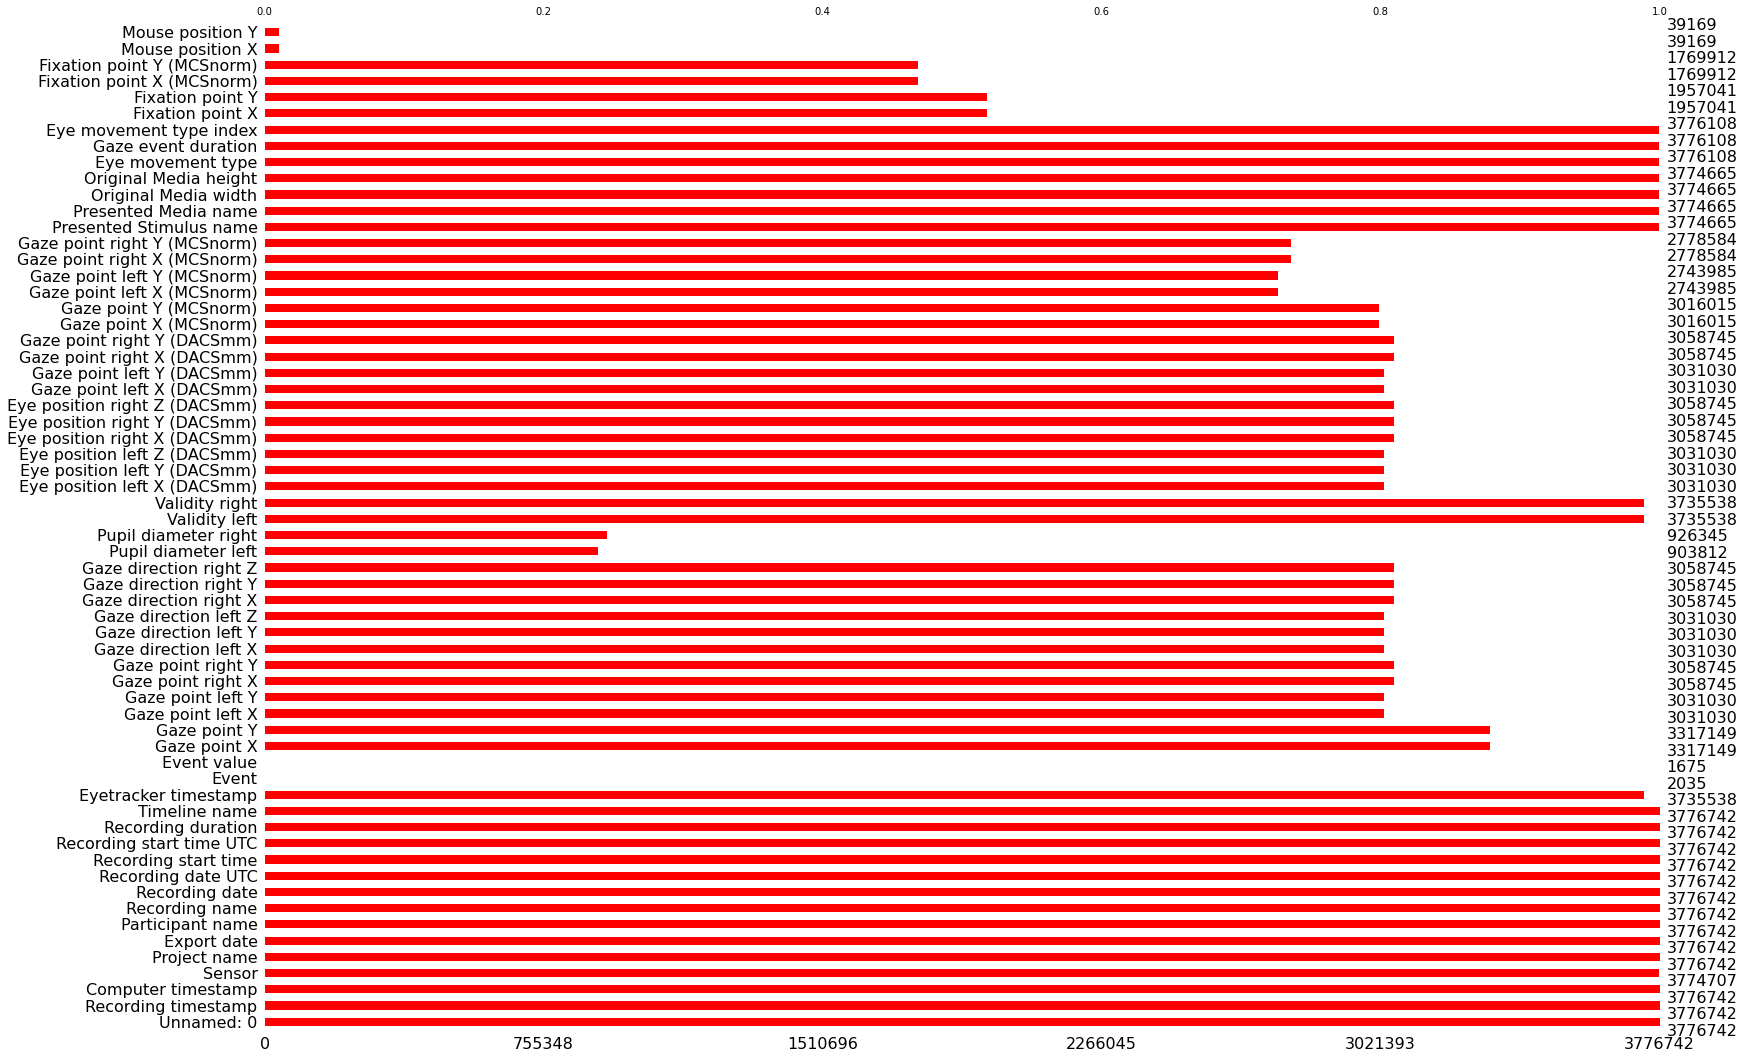

In [20]:
# creating a bar plot of the missing values
msno.bar(data1,color='red')
plt.show()

The above plot illustrates the proportion of missing values in each column.

In [21]:
# Pupil measurement were extracted at 40Hz frequency and its very important in prediction of our target variable. 
# Also NANs are alot because of the frequency change so we will simply drop the null values in it.

data1 = data1.dropna(subset=['Pupil diameter left', 'Pupil diameter right'])

In [14]:
# now droping columns which has null values more than 70 %
def drop_null_columns(data, null_threshold=70):
    # Calculate the percentage of null values in each column
    null_percentages = (data.isnull().sum() / len(data)) * 100
    
    # Get the names of columns with null percentage greater than the threshold
    null_columns = null_percentages[null_percentages > null_threshold].index
    
    # Drop the null columns from the dataset
    data.drop(null_columns, axis=1, inplace=True)

    
drop_null_columns(data1, 70)


<AxesSubplot:>

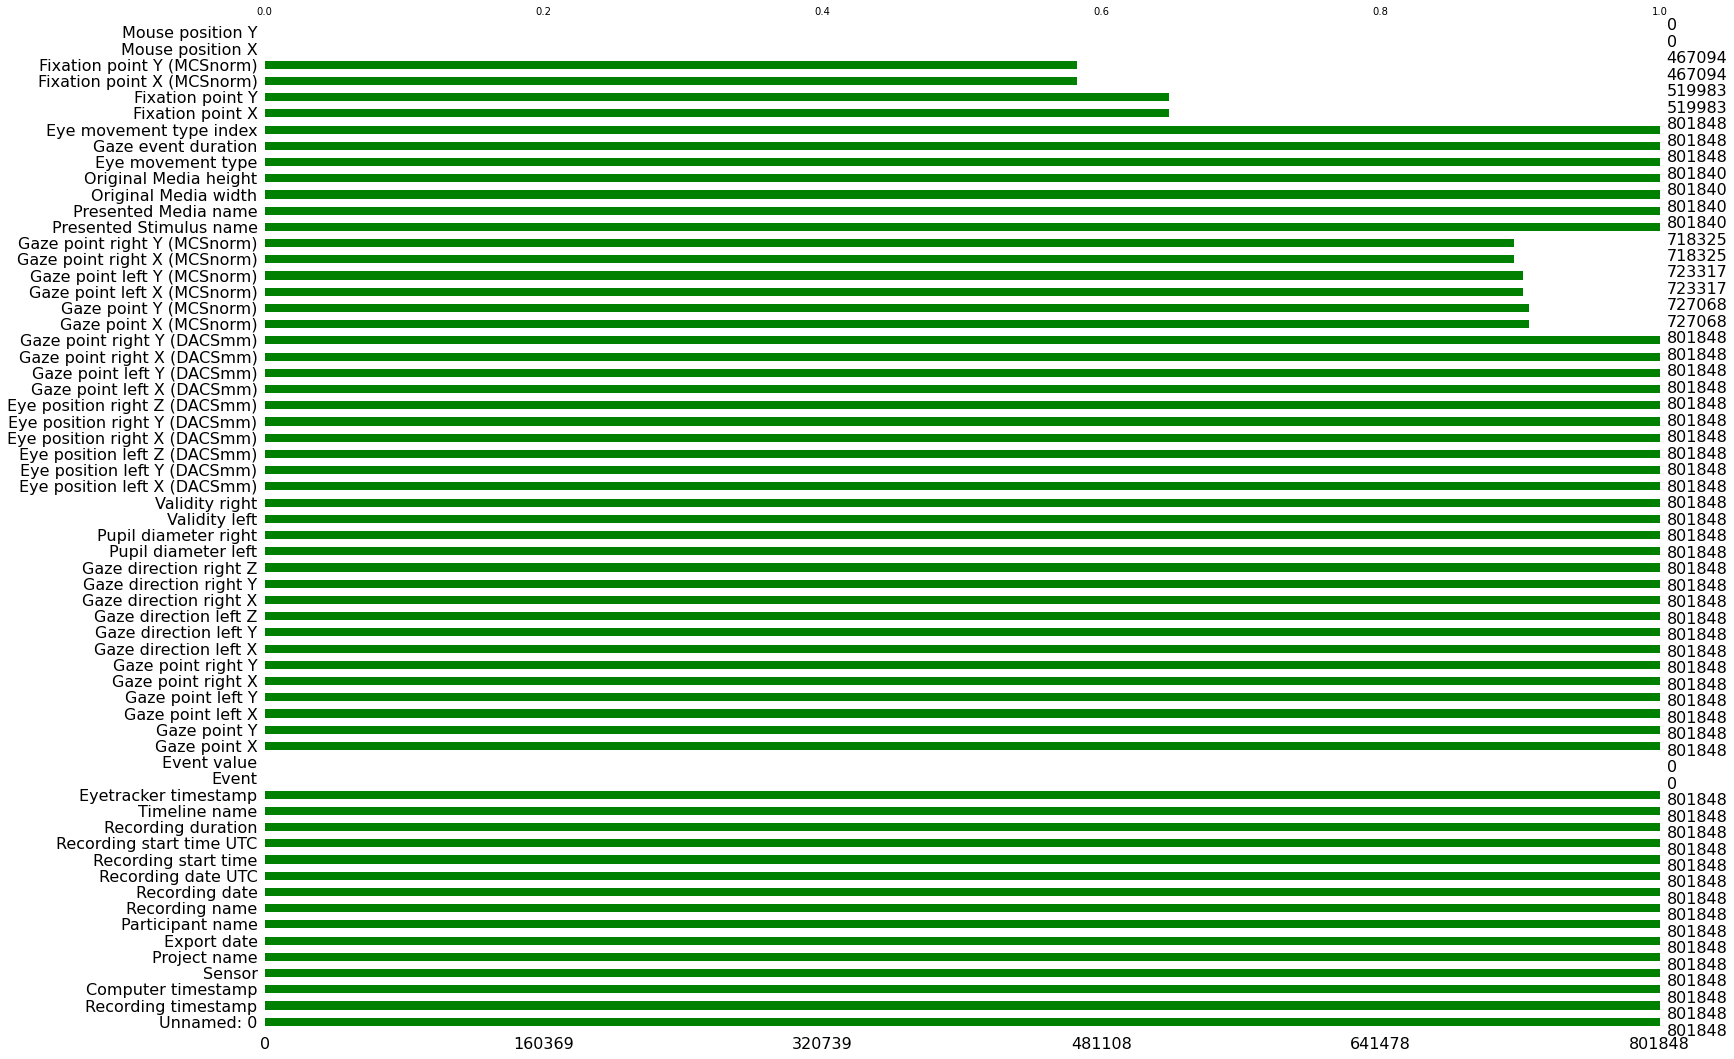

In [22]:
#again visualizing null values

msno.bar(data1,color='green')


The above plot can highlite that there are no variables which has null values greater than 70%

In [23]:
# Now checking again if there is any variable which has no variance and droping it 

# finding columns with no variance or constant values
no_variance_cols = []
for col in data1.columns:
    if data1[col].nunique() <= 1:
        no_variance_cols.append(col)

# printing the columns with no variance or constant values
print('Columns with no variance or constant values:', no_variance_cols)
# droping the above columns with no variance or constant values
data1 = data1.drop(columns=no_variance_cols)

Columns with no variance or constant values: ['Sensor', 'Event', 'Event value', 'Validity left', 'Validity right', 'Mouse position X', 'Mouse position Y']


In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801848 entries, 4 to 3776737
Data columns (total 55 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     801848 non-null  int64  
 1   Recording timestamp            801848 non-null  int64  
 2   Computer timestamp             801848 non-null  int64  
 3   Project name                   801848 non-null  object 
 4   Export date                    801848 non-null  object 
 5   Participant name               801848 non-null  object 
 6   Recording name                 801848 non-null  object 
 7   Recording date                 801848 non-null  object 
 8   Recording date UTC             801848 non-null  object 
 9   Recording start time           801848 non-null  object 
 10  Recording start time UTC       801848 non-null  object 
 11  Recording duration             801848 non-null  int64  
 12  Timeline name                

In [25]:
# our dataset has variables which are inccorectly filled lets tranform it.

data1 = data1.replace(',','.',regex = True)
    

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801848 entries, 4 to 3776737
Data columns (total 55 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     801848 non-null  int64  
 1   Recording timestamp            801848 non-null  int64  
 2   Computer timestamp             801848 non-null  int64  
 3   Project name                   801848 non-null  object 
 4   Export date                    801848 non-null  object 
 5   Participant name               801848 non-null  object 
 6   Recording name                 801848 non-null  object 
 7   Recording date                 801848 non-null  object 
 8   Recording date UTC             801848 non-null  object 
 9   Recording start time           801848 non-null  object 
 10  Recording start time UTC       801848 non-null  object 
 11  Recording duration             801848 non-null  int64  
 12  Timeline name                

## Preprocessing of data2

In [27]:
# extracting Extended empathy scores from data2 so that we can merge it with data1 later.

def extract_em_score(data2):
    extended_empathy_scores = {}
    for participant, score in data2[data2.index % 2 == 0][['Participant nr', 'Total Score extended']].values:
        extended_empathy_scores[participant] = score
    return extended_empathy_scores
extended_empathy_scores = extract_em_score(data2)

In [28]:
extended_empathy_scores

{1: 137,
 3: 123,
 5: 124,
 7: 97,
 9: 99,
 11: 151,
 13: 117,
 15: 137,
 17: 123,
 19: 112,
 21: 114,
 23: 141,
 25: 120,
 27: 112,
 29: 135,
 31: 108,
 33: 119,
 35: 139,
 37: 132,
 39: 126,
 41: 128,
 43: 127,
 45: 121,
 47: 116,
 49: 115,
 51: 103,
 53: 111,
 55: 121,
 57: 140,
 59: 136}

In [29]:
# Changing values of Particpant name to int so that it can be easily match with the other data set 
def participant_names_to_int(data1):
    data1['Participant name'] = data1['Participant name'].str[-2:].astype(int)
    return data1
data1= participant_names_to_int(data1)

In [30]:
# merging the extended empathy scores with data1
def merging_sets(data1,extended_empathy_scores):
    data1['Empathy Score'] = [extended_empathy_scores.get(name, 0) for name in data1['Participant name']]
    return data1
merged_data= merging_sets(data1,extended_empathy_scores)



In [31]:
merged_data.sort_values('Participant name',inplace= True)

In [32]:
merged_data['Participant name'].unique()

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59])

In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801848 entries, 4 to 2778518
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     801848 non-null  int64  
 1   Recording timestamp            801848 non-null  int64  
 2   Computer timestamp             801848 non-null  int64  
 3   Project name                   801848 non-null  object 
 4   Export date                    801848 non-null  object 
 5   Participant name               801848 non-null  int32  
 6   Recording name                 801848 non-null  object 
 7   Recording date                 801848 non-null  object 
 8   Recording date UTC             801848 non-null  object 
 9   Recording start time           801848 non-null  object 
 10  Recording start time UTC       801848 non-null  object 
 11  Recording duration             801848 non-null  int64  
 12  Timeline name                

In [33]:
# changing type of Eyetracker to datetime  
merged_data['Eyetracker timestamp'] = pd.to_datetime(merged_data['Eyetracker timestamp'], unit='ms')


In [34]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 801848 entries, 4 to 2778518
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     801848 non-null  int64         
 1   Recording timestamp            801848 non-null  int64         
 2   Computer timestamp             801848 non-null  int64         
 3   Project name                   801848 non-null  object        
 4   Export date                    801848 non-null  object        
 5   Participant name               801848 non-null  int32         
 6   Recording name                 801848 non-null  object        
 7   Recording date                 801848 non-null  object        
 8   Recording date UTC             801848 non-null  object        
 9   Recording start time           801848 non-null  object        
 10  Recording start time UTC       801848 non-null  object        
 11 

In [35]:
# Trying to change variables which are obj or string to numeric form
def convert_to_numeric(merged_data):
    for col in merged_data.columns:
        if not pd.api.types.is_numeric_dtype(merged_data[col]):
            try:
                merged_data[col] = pd.to_numeric(merged_data[col])
            except:
                print(f"Column {col} could not be converted to numeric.")
    return merged_data


In [36]:
convert_to_numeric(merged_data)

Column Project name could not be converted to numeric.
Column Export date could not be converted to numeric.
Column Recording name could not be converted to numeric.
Column Recording date could not be converted to numeric.
Column Recording date UTC could not be converted to numeric.
Column Recording start time could not be converted to numeric.
Column Recording start time UTC could not be converted to numeric.
Column Timeline name could not be converted to numeric.
Column Presented Stimulus name could not be converted to numeric.
Column Presented Media name could not be converted to numeric.
Column Eye movement type could not be converted to numeric.


,Unnamed: 0,Recording timestamp,Computer timestamp,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Empathy Score
4,3086,23442782,512115853,Test group experiment,29.10.2020,1,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,897.0,649.0,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,137
3024243,41661,9730010,970354497,Test group experiment,06.10.2020,1,Recording5,24.09.2020,24.09.2020,15:25:26.217,...,897.0,649.0,Saccade,50.0,106.0,NaN,NaN,NaN,NaN,137
3024240,41658,9704927,970329414,Test group experiment,06.10.2020,1,Recording5,24.09.2020,24.09.2020,15:25:26.217,...,897.0,649.0,Saccade,50.0,106.0,NaN,NaN,NaN,NaN,137
3024237,41655,9679927,970304414,Test group experiment,06.10.2020,1,Recording5,24.09.2020,24.09.2020,15:25:26.217,...,897.0,649.0,Fixation,142.0,23.0,1214.0,-78.0,NaN,NaN,137
3024234,41652,9654932,970279419,Test group experiment,06.10.2020,1,Recording5,24.09.2020,24.09.2020,15:25:26.217,...,897.0,649.0,Fixation,142.0,23.0,1214.0,-78.0,NaN,NaN,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793937,38333,11774710,1834521039247,Participant0059,22.09.2021,59,Recording5,22.09.2021,22.09.2021,15:23:05.590,...,2000.0,1447.0,Unclassified,17.0,235.0,NaN,NaN,NaN,NaN,136
2793931,38327,11724792,1834520989329,Participant0059,22.09.2021,59,Recording5,22.09.2021,22.09.2021,15:23:05.590,...,2000.0,1447.0,Unclassified,17.0,233.0,NaN,NaN,NaN,NaN,136
2793901,38297,11474737,1834520739274,Participant0059,22.09.2021,59,Recording5,22.09.2021,22.09.2021,15:23:05.590,...,2000.0,1447.0,Unclassified,17.0,223.0,NaN,NaN,NaN,NaN,136
2793895,38291,11424736,1834520689273,Participant0059,22.09.2021,59,Recording5,22.09.2021,22.09.2021,15:23:05.590,...,2000.0,1447.0,Unclassified,17.0,221.0,NaN,NaN,NaN,NaN,136


In [37]:
merged_data.isnull().sum()   

Unnamed: 0                            0
Recording timestamp                   0
Computer timestamp                    0
Project name                          0
Export date                           0
Participant name                      0
Recording name                        0
Recording date                        0
Recording date UTC                    0
Recording start time                  0
Recording start time UTC              0
Recording duration                    0
Timeline name                         0
Eyetracker timestamp                  0
Gaze point X                          0
Gaze point Y                          0
Gaze point left X                     0
Gaze point left Y                     0
Gaze point right X                    0
Gaze point right Y                    0
Gaze direction left X                 0
Gaze direction left Y                 0
Gaze direction left Z                 0
Gaze direction right X                0
Gaze direction right Y                0


In [38]:
from sklearn.impute import SimpleImputer, IterativeImputer

# separate numeric and categorical columns
numeric_cols = merged_data.select_dtypes(include='number').columns
categorical_cols = merged_data.select_dtypes(include='object').columns

# impute missing values in numeric columns with IterativeImputer
imputer_numeric = IterativeImputer()
merged_data[numeric_cols] = imputer_numeric.fit_transform(merged_data[numeric_cols])

# impute missing values in categorical columns with SimpleImputer
imputer_categorical = SimpleImputer(strategy='most_frequent')
merged_data[categorical_cols] = imputer_categorical.fit_transform(merged_data[categorical_cols])


In [39]:
# check if there are any remaining missing values
print(merged_data.isnull().sum())  #clearly there are no null values

Unnamed: 0                       0
Recording timestamp              0
Computer timestamp               0
Project name                     0
Export date                      0
Participant name                 0
Recording name                   0
Recording date                   0
Recording date UTC               0
Recording start time             0
Recording start time UTC         0
Recording duration               0
Timeline name                    0
Eyetracker timestamp             0
Gaze point X                     0
Gaze point Y                     0
Gaze point left X                0
Gaze point left Y                0
Gaze point right X               0
Gaze point right Y               0
Gaze direction left X            0
Gaze direction left Y            0
Gaze direction left Z            0
Gaze direction right X           0
Gaze direction right Y           0
Gaze direction right Z           0
Pupil diameter left              0
Pupil diameter right             0
Eye position left X 

<AxesSubplot:>

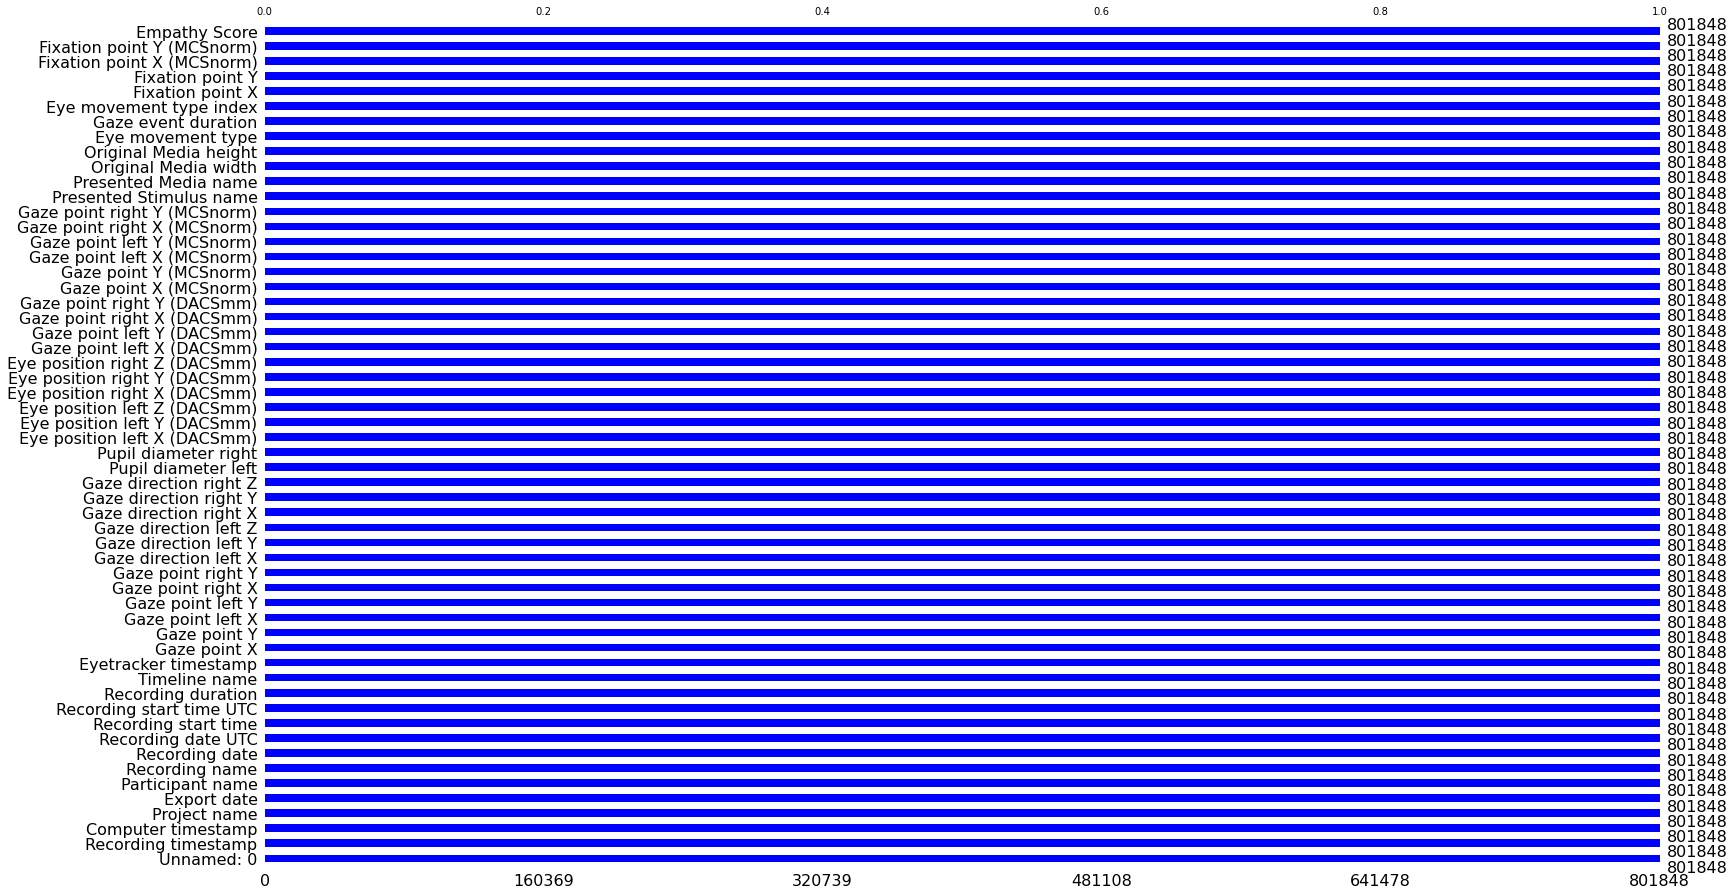

In [40]:
msno.bar(data1,color='blue')


The above plot can summarise that there are no null values. 

# Visualisation
we will use different plots/graphs to see the distributions of different variables

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Recording timestamp'}>,
        <AxesSubplot:title={'center':'Computer timestamp'}>,
        <AxesSubplot:title={'center':'Participant name'}>,
        <AxesSubplot:title={'center':'Recording duration'}>,
        <AxesSubplot:title={'center':'Eyetracker timestamp'}>,
        <AxesSubplot:title={'center':'Gaze point X'}>],
       [<AxesSubplot:title={'center':'Gaze point Y'}>,
        <AxesSubplot:title={'center':'Gaze point left X'}>,
        <AxesSubplot:title={'center':'Gaze point left Y'}>,
        <AxesSubplot:title={'center':'Gaze point right X'}>,
        <AxesSubplot:title={'center':'Gaze point right Y'}>,
        <AxesSubplot:title={'center':'Gaze direction left X'}>,
        <AxesSubplot:title={'center':'Gaze direction left Y'}>],
       [<AxesSubplot:title={'center':'Gaze direction left Z'}>,
        <AxesSubplot:title={'center':'Gaze direction right X'}>,
        <AxesSubplot:title={'c

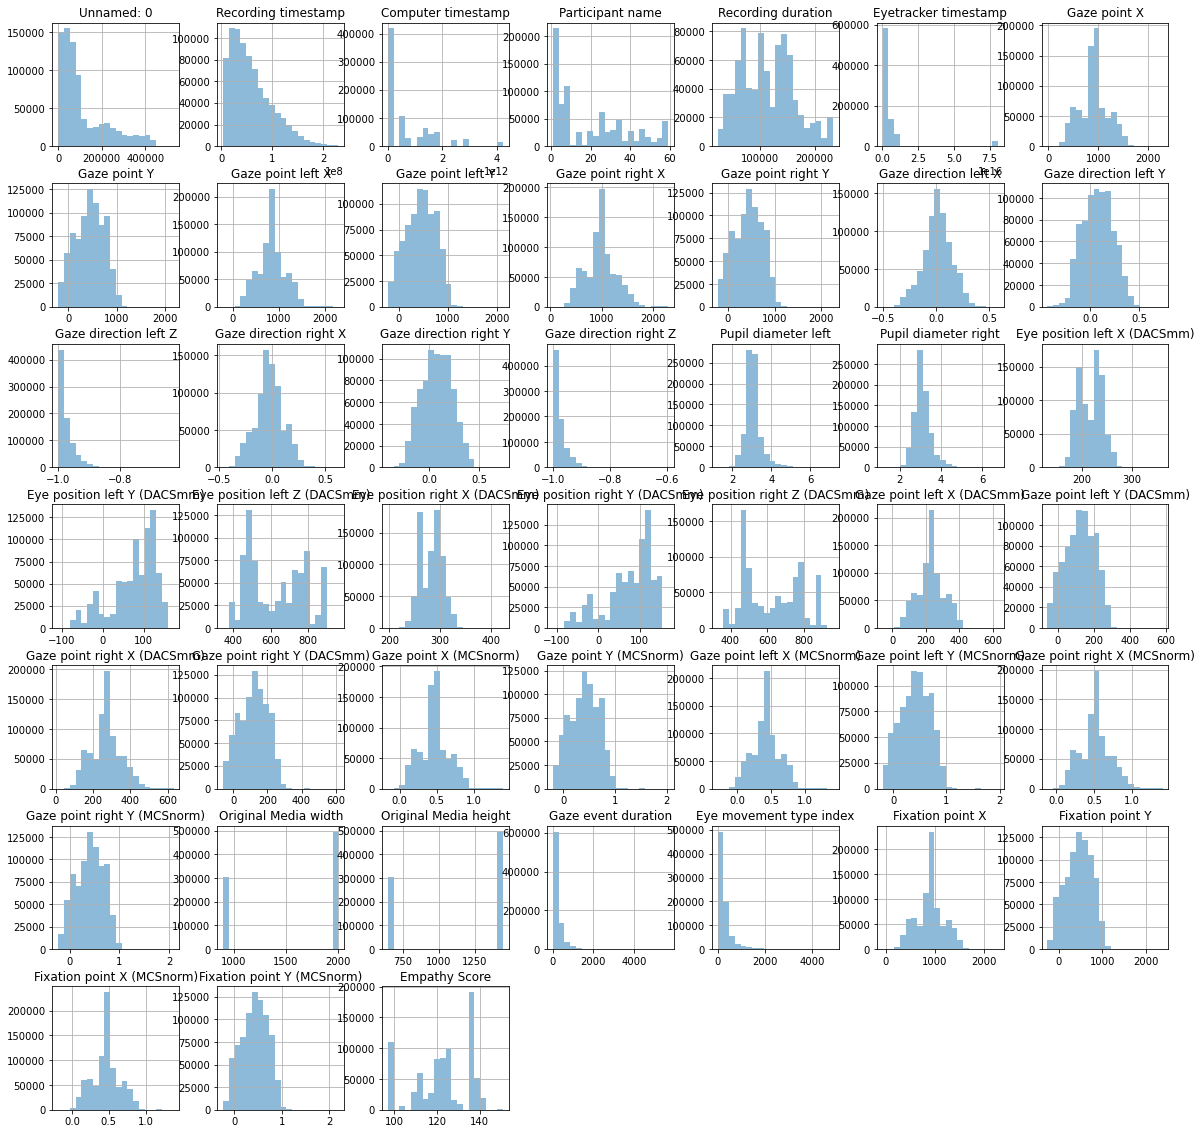

In [41]:
merged_data.hist(figsize=(20,20), bins=20, alpha=0.5) 

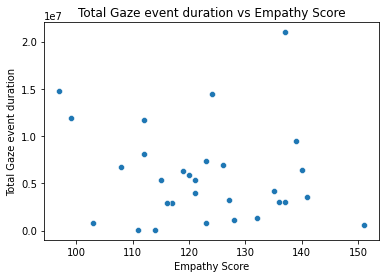

In [42]:
# Visualizing sum of gaze event duration with empathy score 

# Create a dictionary of Empathy Scores keyed by Participant name
empathy_dict = dict(zip(merged_data['Participant name'], merged_data['Empathy Score']))

# Group the data by Participant ID and calculate the sum of Gaze event duration
grouped_data = merged_data.groupby('Participant name')['Gaze event duration'].sum().reset_index()

# Add a new column to the resulting DataFrame with the Empathy Score for each participant
grouped_data['Empathy Score'] = grouped_data['Participant name'].map(empathy_dict)

# Plot a scatter plot with the Empathy Score on the x-axis and the Total Gaze event duration on the y-axis
sns.scatterplot(x='Empathy Score', y='Gaze event duration', data=grouped_data)

# Add labels and a title to the plot
plt.xlabel('Empathy Score')
plt.ylabel('Total Gaze event duration')
plt.title('Total Gaze event duration vs Empathy Score')

# Show the plot
plt.show()


Most of the Empathy scores are reported when total Gaze event duration is 0.5

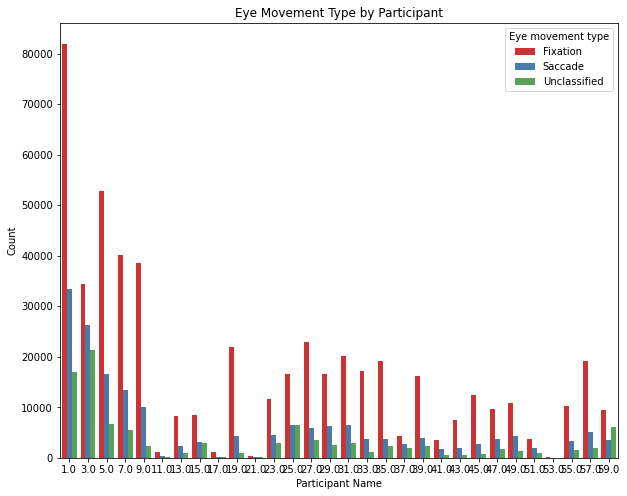

In [43]:
# Visualizing number of Eye movement types among Participants

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the countplot
sns.countplot(x='Participant name', hue='Eye movement type', data=merged_data, palette='Set1')

# Add a title and axis labels
plt.title('Eye Movement Type by Participant')
plt.xlabel('Participant Name')
plt.ylabel('Count')

# Display the plot
plt.show()


Most of the participants Eye movement type is Fixation 

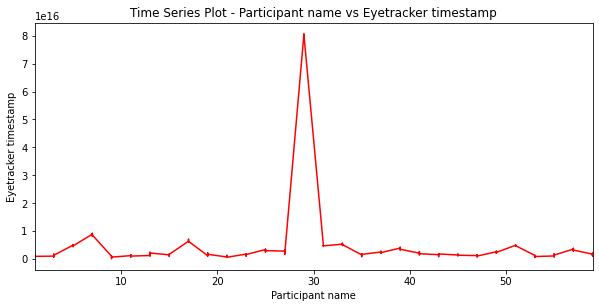

In [44]:
#Trying to generate a timeseries plot of Eyetracker timestamp with Participant name

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_data['Participant name'], merged_data['Eyetracker timestamp'], color='red')
plt.xlabel('Participant name')
plt.ylabel('Eyetracker timestamp')
plt.title('Time Series Plot - Participant name vs Eyetracker timestamp')
plt.xlim([merged_data['Participant name'].min(), merged_data['Participant name'].max()])

plt.show()

This plot generates a time series plot of the Participant name over time

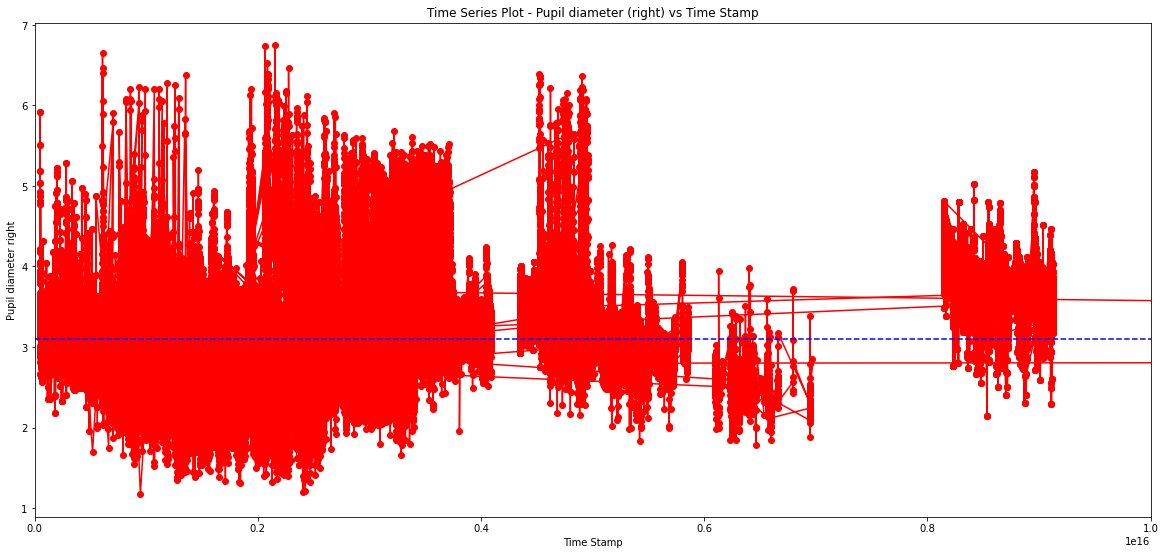

In [45]:
##Trying to generate a timeseries plot of Eyetracker timestamp with pupil diameter Right
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 2)
plt.plot(merged_data['Eyetracker timestamp'], merged_data['Pupil diameter right'], color='red',marker='o', label='Pupil diameter (right)')
plt.xlabel('Time Stamp')
plt.ylabel('Pupil diameter right')
plt.title('Time Series Plot - Pupil diameter (right) vs Time Stamp')

plt.xlim([0, 1e16])
# Add horizontal lines to indicate the average pupil diameter for the right and left eyes, respectively
average_diameter_right = merged_data['Pupil diameter right'].mean()
plt.axhline(average_diameter_right, color='blue', linestyle='--', label='Average diameter (right)')
plt.show()

This plot generates a time series plot of the Right pupil diameter over time it decreases

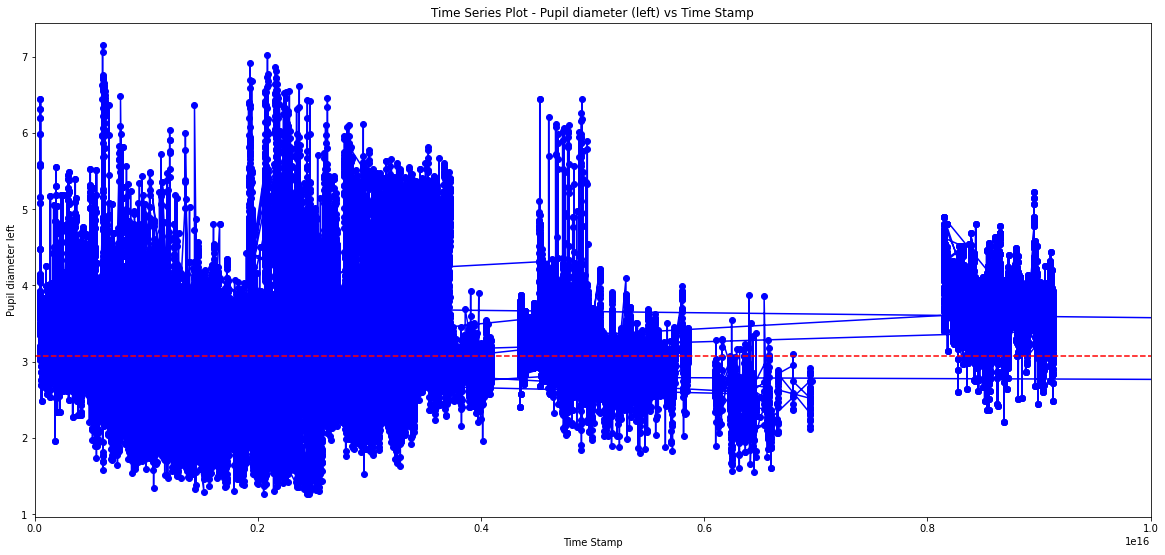

In [46]:
##Trying to generate a timeseries plot of Eyetracker timestamp with pupil diameter Left
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 2)
plt.plot(merged_data['Eyetracker timestamp'], merged_data['Pupil diameter left'], color='blue',marker='o', label='Pupil diameter (Left)')
plt.xlabel('Time Stamp')
plt.ylabel('Pupil diameter left')
plt.title('Time Series Plot - Pupil diameter (left) vs Time Stamp')

plt.xlim([0, 1e16])
# Add horizontal lines to indicate the average pupil diameter for the right and left eyes, respectively
average_diameter_left = merged_data['Pupil diameter left'].mean()
plt.axhline(average_diameter_left, color='red', linestyle='--', label='Average diameter (left)')
plt.show()

This plot generates a time series plot of the Left pupil diameter over time it decreases

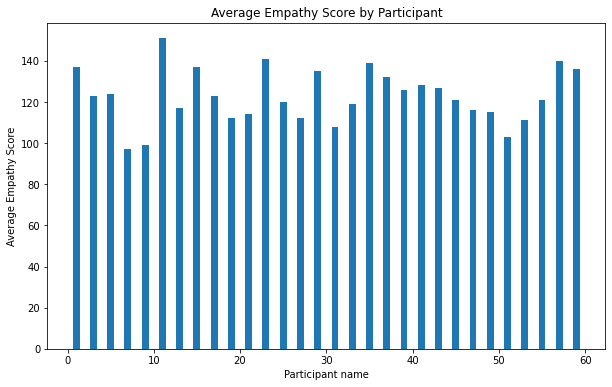

In [48]:
# Distribution of Average empathy score among participants

average_empathy = merged_data.groupby('Participant name')['Empathy Score'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_empathy.index, average_empathy)
plt.xlabel('Participant name')
plt.ylabel('Average Empathy Score')
plt.title('Average Empathy Score by Participant')
plt.show()

Participant 11 has the highest Average score while Participant 7 has the lowest

In [49]:
# computing the correlation matrix
corr_matrix = merged_data.corr()

# print the correlation matrix
print(corr_matrix)

                               Unnamed: 0  Recording timestamp  \
Unnamed: 0                       1.000000             0.017835   
Recording timestamp              0.017835             1.000000   
Computer timestamp              -0.355017             0.061700   
Participant name                -0.412727             0.087410   
Recording duration               0.004838             0.560155   
Eyetracker timestamp            -0.036982             0.034920   
Gaze point X                     0.044310             0.012976   
Gaze point Y                     0.205050             0.023804   
Gaze point left X                0.100702             0.012170   
Gaze point left Y                0.201756             0.021174   
Gaze point right X              -0.013941             0.013251   
Gaze point right Y               0.206192             0.026181   
Gaze direction left X            0.116860            -0.038366   
Gaze direction left Y           -0.027982             0.105766   
Gaze direc

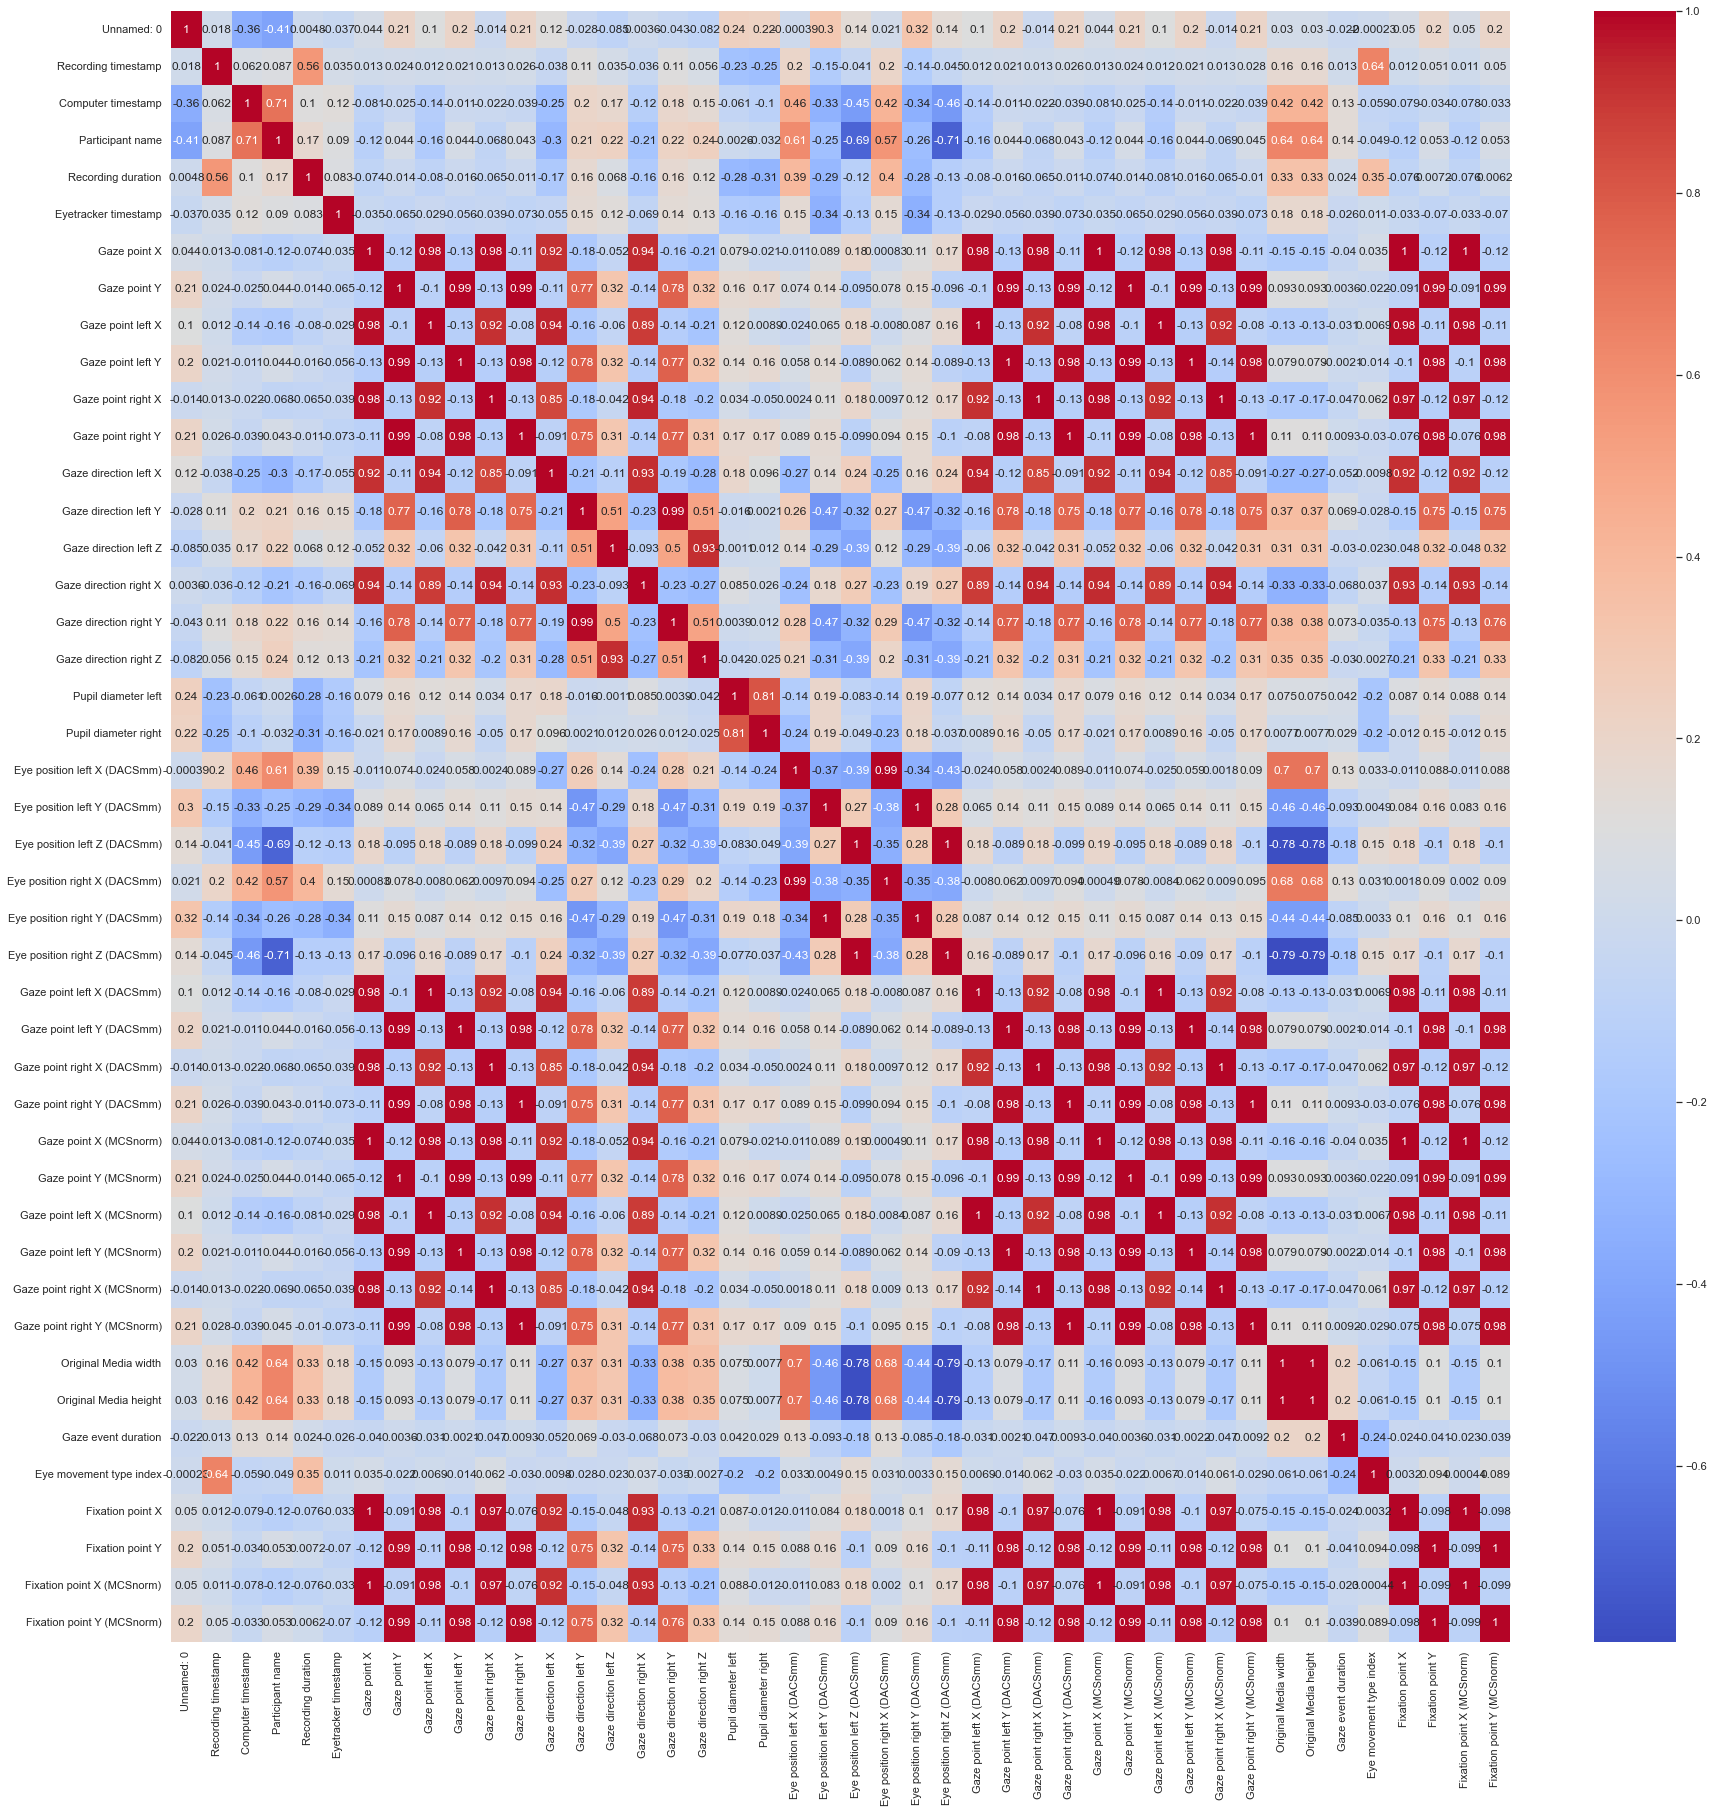

In [50]:
# ploting the correlation heatmap
corr = merged_data.corr()
sns.set(style='white')
plt.figure(figsize=(30,30))
sns.heatmap(merged_data.drop('Empathy Score', axis=1).corr(), annot=True, cmap='coolwarm')
# show the plot
plt.show()

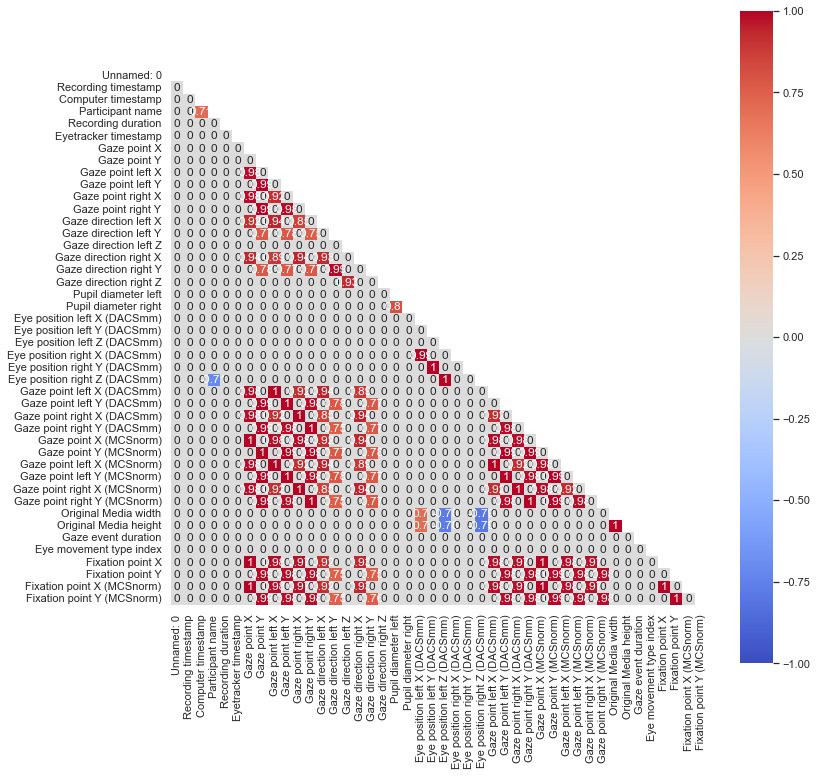

In [51]:
import numpy as np 
# Compute correlation matrix
corr_matrix = merged_data.drop('Empathy Score', axis=1).corr()

# Creating mask to display only upper triangle of the heatmap
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Filter out correlation values less than 0.7
corr_matrix[corr_matrix.abs() < 0.7] = 0

# Ploting heatmap with filtered correlation values
sns.set(style='white')
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, vmax=1.0, vmin=-1.0, square=True)

# Show the plot
plt.show()


In [52]:
# droping the columns with correlation greater than 0.8
cols_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.8:
            colname = corr_matrix.columns[i]
            cols_to_drop.add(colname)

# Drop columns from merged_data
merged_data.drop(cols_to_drop, axis=1, inplace=True)

In [53]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801848 entries, 4 to 2778518
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    801848 non-null  float64
 1   Recording timestamp           801848 non-null  float64
 2   Computer timestamp            801848 non-null  float64
 3   Project name                  801848 non-null  object 
 4   Export date                   801848 non-null  object 
 5   Participant name              801848 non-null  float64
 6   Recording name                801848 non-null  object 
 7   Recording date                801848 non-null  object 
 8   Recording date UTC            801848 non-null  object 
 9   Recording start time          801848 non-null  object 
 10  Recording start time UTC      801848 non-null  object 
 11  Recording duration            801848 non-null  float64
 12  Timeline name                 801848 non-nu

In [54]:
#based on my understanding and looking at the above plot i can drop few more variables, because I believe its not going to effect my predictions.


add_cols_to_drop = ['Unnamed: 0','Project name', 'Export date', 'Recording name', 'Recording date', 'Recording date UTC', 'Recording start time', 'Recording start time UTC', 'Timeline name', 'Presented Stimulus name', 'Presented Media name','Eye movement type']
merged_data.drop(add_cols_to_drop, axis=1, inplace=True)

In [55]:
merged_data.info()  # now the data is ready for model building 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801848 entries, 4 to 2778518
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Recording timestamp           801848 non-null  float64
 1   Computer timestamp            801848 non-null  float64
 2   Participant name              801848 non-null  float64
 3   Recording duration            801848 non-null  float64
 4   Eyetracker timestamp          801848 non-null  float64
 5   Gaze point X                  801848 non-null  float64
 6   Gaze point Y                  801848 non-null  float64
 7   Gaze direction left Y         801848 non-null  float64
 8   Gaze direction left Z         801848 non-null  float64
 9   Pupil diameter left           801848 non-null  float64
 10  Eye position left X (DACSmm)  801848 non-null  float64
 11  Eye position left Y (DACSmm)  801848 non-null  float64
 12  Eye position left Z (DACSmm)  801848 non-nu

# Model building 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [57]:
X = merged_data.drop('Empathy Score', axis=1)
y =  merged_data['Empathy Score']


In [58]:
# Scaling the data set 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## RandomForestRegressor

In [60]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=42)

In [62]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [63]:
y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("R-squared score: ", r2)


Mean Squared Error (MSE):  0.000820274989087734
R-squared score:  0.9999955161870319


## The above MSE and R-quared score is very unexpected.
## Reasons for it could be many such as Data Leakage, or the way we have imported the data.
## Also it is obvious that the empathy scores we extracted from Questionare dataset is 30 and is fixed , so it will be repeated when we merged with our main data set


### To fix the above issue, we need to upload the data in a different way and then see if our model could be build better.
### Plus point is that now we know what features are important we dnt need to that whole thing again 

# Uploading the dataset in a different way 

I am droping the variables which are not helpful plus I am tranforming every excel file to a single row by taking mean 

In [64]:
path = r"C:\Users\ak22755\EyeT\EyeT_group_dataset_III_image_name_letter_card_participant_**_trial_*.csv"
file_names = glob.glob(path)     # glob is used to get a list of all CSV files in the directory 

dfs = []
for file_name in file_names:
    # Read in the data
    df = pd.read_csv(file_name)
    df = df.replace(',', '.', regex=True)
    # Group by Participant name and calculate the mean for each variable
    group_vars = ['Participant name']
    # taking only those columns which has some relation with empathy
    mean_vars = [col for col in df.columns if col not in ['Unnamed: 0','Sensor','Project name','Export date','Recording name','Recording date',
 'Recording date UTC','Recording start time','Recording start time UTC','Timeline name','Recording Fixation filter name',
 'Recording software version','Recording resolution height','Recording resolution width','Recording monitor latency','Event',
 'Event value','Gaze point left X','Gaze point left Y','Gaze point right X','Gaze point right Y','Gaze direction left X','Gaze direction right X',
 'Gaze direction right Y','Gaze direction right Z','Pupil diameter right','Validity left','Validity right','Eye position right X (DACSmm)',
 'Eye position right Y (DACSmm)','Eye position right Z (DACSmm)','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)',
 'Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Gaze point left X (MCSnorm)',
 'Gaze point left Y (MCSnorm)','Gaze point right X (MCSnorm)','Gaze point right Y (MCSnorm)','Presented Stimulus name','Presented Media name',
 'Presented Media width','Presented Media height','Presented Media position X (DACSpx)','Presented Media position Y (DACSpx)',
 'Original Media height', 'Eye movement type','Fixation point X','Fixation point Y','Fixation point X (MCSnorm)','Fixation point Y (MCSnorm)',
 'Mouse position X','Mouse position Y']]
    df['Pupil diameter left'] = df['Pupil diameter left'].astype(float)

    df = df.groupby(group_vars)[mean_vars].mean().reset_index()
    
    # Append to the list of DataFrames
    dfs.append(df)

# Concatenate all data into one DataFrame
new_data = pd.concat(dfs, ignore_index=True)

# Print the resulting DataFrame
print(new_data)  # is used to concatenate all DataFrames in the data list into a single DataFrame

    Participant name  Recording timestamp  Computer timestamp  \
0    Participant0001         5.397491e+07        5.426480e+08   
1    Participant0001         4.366363e+07        6.342457e+08   
2    Participant0003         3.792060e+07        9.160399e+08   
3    Participant0003         5.978738e+07        1.018613e+09   
4    Participant0003         6.033253e+07        1.150769e+09   
..               ...                  ...                 ...   
355  Participant0001         7.471664e+07        1.240994e+09   
356  Participant0001         4.848202e+07        1.381181e+09   
357  Participant0001         2.515177e+07        1.497538e+09   
358  Participant0003         4.750095e+07        6.475492e+08   
359  Participant0003         3.967535e+07        7.403466e+08   

     Recording duration  Eyetracker timestamp  Gaze point X  Gaze point Y  \
0               83579.0          5.398770e+08   1070.355771    253.597742   
1               73900.0          6.320927e+08    965.955342    30

In [65]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Participant name         360 non-null    object 
 1   Recording timestamp      360 non-null    float64
 2   Computer timestamp       360 non-null    float64
 3   Recording duration       360 non-null    float64
 4   Eyetracker timestamp     360 non-null    float64
 5   Gaze point X             360 non-null    float64
 6   Gaze point Y             360 non-null    float64
 7   Pupil diameter left      360 non-null    float64
 8   Original Media width     360 non-null    float64
 9   Gaze event duration      360 non-null    float64
 10  Eye movement type index  360 non-null    float64
dtypes: float64(10), object(1)
memory usage: 31.1+ KB


Now we need to change the Participant name data type so that we can build model, and also we need to merge the empathy score with it

In [66]:
new_data['Participant name'] = new_data['Participant name'].astype(str)

In [67]:
def participant_names_to_int(new_data):
    new_data['Participant name'] =new_data['Participant name'].str[-2:].astype(int)
    return new_data
new_data= participant_names_to_int(new_data)

In [68]:
# loading Questionnaire datasetIB 
questonare_data = pd.read_csv('m:\\pc\\downloads\\Questionnaire_datasetIB.csv', encoding='ISO-8859-1')

In [69]:
# extracting Extended empathy scores from data2 so that we can merge it with data1 later.

def extract_em_score(questonare_data):
    extended_empathy_scores = {}
    for participant, score in questonare_data[questonare_data.index % 2 == 0][['Participant nr', 'Total Score extended']].values:
        extended_empathy_scores[participant] = score
    return extended_empathy_scores
extended_empathy_scores = extract_em_score(questonare_data)

In [70]:
def merging_sets(new_data,extended_empathy_scores):
    new_data['Empathy Score'] = [extended_empathy_scores.get(name, 0) for name in new_data['Participant name']]
    return new_data
merged_data= merging_sets(new_data,extended_empathy_scores)

In [71]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Participant name         360 non-null    int32  
 1   Recording timestamp      360 non-null    float64
 2   Computer timestamp       360 non-null    float64
 3   Recording duration       360 non-null    float64
 4   Eyetracker timestamp     360 non-null    float64
 5   Gaze point X             360 non-null    float64
 6   Gaze point Y             360 non-null    float64
 7   Pupil diameter left      360 non-null    float64
 8   Original Media width     360 non-null    float64
 9   Gaze event duration      360 non-null    float64
 10  Eye movement type index  360 non-null    float64
 11  Empathy Score            360 non-null    int64  
dtypes: float64(10), int32(1), int64(1)
memory usage: 32.5 KB


i think this looks good, and we can proceed to model building

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
#scalling the data set using RobustScaler
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler object
scaler = RobustScaler()


In [83]:
# Scale the dataset
data_scaled = scaler.fit_transform(merged_data)
data_scaled = pd.DataFrame(data_scaled, columns =merged_data.columns )

In [84]:
# assigning Empathy Score column to y
y =  data_scaled['Empathy Score']
# assigning all columns except Empathy Score to X
X = data_scaled.drop('Empathy Score', axis=1)
#finding variance of target variabel
var = np.var(y)

In [85]:
#import numpy as np
var = np.var(y)

## model 1 = RandomForestRegressor

In [86]:
model1 = RandomForestRegressor(n_estimators=20, random_state=50)

The results are really good, lets cross check it by using GroupKFold

In [87]:
from sklearn.model_selection import GroupKFold


# Create a GroupKFold object with k=10 folds
n_splits=20
gkf = GroupKFold(n_splits=n_splits)
sc=[]
# Loop through the splits and train/test the model
for train_index, test_index in gkf.split(X, y, groups=X['Participant name']):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = X_train.drop('Participant name', axis=1)
    X_test = X_test.drop('Participant name', axis=1)
    
    # Train and test the model
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = 1 - (mse/var)
    sc.append(r2)
    
    print("MSE:", mse)
    print("R-squared score:", r2)


MSE: 0.37545705782312916
R-squared score: 0.05984135258415946
MSE: 0.1886125283446712
R-squared score: 0.5277071083379585
MSE: 0.5478571428571426
R-squared score: -0.3718549689597772
MSE: 2.0293303571428574
R-squared score: -4.081519827575344
MSE: 1.37687570861678
R-squared score: -2.44774875555192
MSE: 0.6386500850340137
R-squared score: -0.5992039238757427
MSE: 1.198173894557823
R-squared score: -2.000272666620409
MSE: 0.3358747874149659
R-squared score: 0.15895685203527765
MSE: 0.3015334467120181
R-squared score: 0.24494886564376717
MSE: 0.11069090136054419
R-squared score: 0.7228258040806534
MSE: 1.0193941326530611
R-squared score: -1.5526013933402383
MSE: 0.4553022250566893
R-squared score: -0.14009396056251266
MSE: 0.4183662840136054
R-squared score: -0.04760496974840045
MSE: 0.18987244897959185
R-squared score: 0.5245522195023455
MSE: 1.9420727040816321
R-squared score: -3.8630233700726917
MSE: 0.3957631802721089
R-squared score: 0.008994055355067032
MSE: 1.1361791383219952
R-sq

In [88]:
#now lets check he model performance 
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = 1 - (mse/var)
print("Mean Squared Error (MSE): ", mse)
print("R-squared score: ", r2)

Mean Squared Error (MSE):  0.20778698979591834
R-squared score:  0.4796935329707753


some improvement can be seen, lets try using some different model

## model2 : GradientBoostingRegressor

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a GradientBoostingRegressor object
model2 = GradientBoostingRegressor()

# Create a GroupKFold object with k=10 folds
n_splits = 20
gkf = GroupKFold(n_splits=n_splits)

# Initialize a list to store the R-squared scores
sc = []

# Loop through the splits and train/test the model
for train_index, test_index in gkf.split(X, y, groups=X['Participant name']):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = X_train.drop('Participant name', axis=1)
    X_test = X_test.drop('Participant name', axis=1)
    
    # Train and test the model
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = 1 - (mse/var)
    sc.append(r2)
    
    print("MSE:", mse)
    print("R-squared score:", r2)


MSE: 0.49962411821803326
R-squared score: -0.25107765432252793
MSE: 0.2879104533426286
R-squared score: 0.2790613553494573
MSE: 0.4663932825129047
R-squared score: -0.16786638715346225
MSE: 3.5102477631908813
R-squared score: -7.789792921380311
MSE: 2.112673413678671
R-squared score: -4.29021398759064
MSE: 0.9470807303195474
R-squared score: -1.371525903849931
MSE: 0.6096033795478888
R-squared score: -0.5264698767384908
MSE: 0.1880061068928713
R-squared score: 0.5292256105474888
MSE: 0.47638009579507734
R-squared score: -0.19287374464408935
MSE: 0.16229191912911803
R-squared score: 0.5936149074954126
MSE: 0.5877512490480978
R-squared score: -0.47175131698373973
MSE: 0.6053203056384899
R-squared score: -0.5157448979705075
MSE: 0.5016900462667815
R-squared score: -0.2562508161515553
MSE: 0.34147263404415396
R-squared score: 0.14493963274034039
MSE: 1.9411656853999486
R-squared score: -3.8607521610510886
MSE: 0.18106782832363388
R-squared score: 0.546599322025624
MSE: 2.06423936295963
R-s

In [93]:
#lets see on model2 
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = 1 - (mse/var)
print("Mean Squared Error (MSE): ", mse)
print("R-squared score: ", r2)

Mean Squared Error (MSE):  0.11630388823850149
R-squared score:  0.7087706730312082


We summarize from the above analysis that we can use this model to predict Empathy, keeping in mind the limitation and EDA it needed